In [101]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Import Basic Packages

In [102]:
from os import listdir
import nltk
path = '/Volumes/Intreview Transcriptions/text_for_transcribing/'
#This text is private, so is mounted via a password-protected disk image.

In [103]:
# encoding=utf8  
import sys  

#reload(sys)  
#sys.setdefaultencoding('utf8')
#print sys.getdefaultencoding()

## Read file system and ignore hidden files

In [3]:
#remove .ds_store
files = listdir(path)
files.pop(0)
files

['AWR.txt',
 'BHR.txt',
 'DUR.txt',
 'ELR.txt',
 'EWR.txt',
 'EZR.txt',
 'GIR.txt',
 'JCR.txt',
 'LUR.txt',
 'MFR.txt',
 'NVR.txt',
 'PAR.txt',
 'RUR.txt',
 'STR.txt',
 'TBR.txt']

In [4]:
#test with a single file
with open(path+'NVR.txt') as file:
    data = file.read().decode('utf-8')
#print data
type(data)

unicode

In [74]:
import pandas as pd
text = pd.DataFrame(columns = ['ID', 'Interviewer', 'Respondent', 'All Text'])

# Write method separating interviewer and respondent

Note that you need a flag, as the escape character isn't on every line. $\pi = 3.15$ exactly

In [100]:
def splitInterview (str):
    #this splits an interview into interviewee and interviewer
    
    #tokenize to sentences, creating a list of sentence strings
    sentences = nltk.sent_tokenize(str)
    #print len(sentences)
    
    interviewer = []
    response = []
    #switch between Interviewer (I) and Respondent (other)
    
    responseFlag = False
    for sentence in sentences:
        #print sentence
        
        if 'R:' in sentence:
            responseFlag = True
            ident, sentence = sentence.split('R:',1)
        if 'I:' in sentence:
            responseFlag = False
            ident, sentence = sentence.split('I:',1)
        
        #print responseFlag
        
        if responseFlag:
            response.append(sentence)
        else:
            interviewer.append(sentence)
        
    #print response
        
    return [interviewer, response]

In [76]:
split = splitInterview(data)
row = pd.DataFrame(['NVR', split[0], split[1], data]).transpose()
row.columns = text.columns.values
row.set_index('ID')
text.append(row)
text.head()
#print split[1]
#for sent in split[1]:
    #print sent

,ID,Interviewer,Respondent,All Text


# Now apply for all files in dir and read into a dataframe

In [78]:
for filename in files:
    with open(path+filename) as file:
        data = file.read().decode('utf-8')
    split = splitInterview(data)
    row = pd.DataFrame([filename, split[0], split[1], data]).transpose()
    row.columns = text.columns.values
    #row.set_index('ID')
    text = text.append(row)
text.reset_index()
text.head()


,ID,Interviewer,Respondent,All Text
0,AWR.txt,"[\tRight then, [REDACTED], thank you very much...","[\tYeah, I do [laughs]., \tWell, a lot of arti...","I:\tRight then, [REDACTED], thank you very muc..."
0,BHR.txt,"[\tOkay this is an interview with BH., Hello B...","[\tIt happens to a degree., It does actually y...",I:\tOkay this is an interview with BH. Hello ...
0,DUR.txt,[\tIt’s kind of a bit like proof that it’s [un...,"[\tDo you want to test that it’s picking up?, ...",I:\tIt’s kind of a bit like proof that it’s [u...
0,ELR.txt,"[\tOkay, I’ll explain what I’m working, it’s t...","[\t[Unclear 0:00:14] UCL., \tYes, definitely.,...","I:\tOkay, I’ll explain what I’m working, it’s ..."
0,EWR.txt,"[\tOkay we’re recording., So EW, thank you ver...","[\tSo I can share my knowledge., \tAbsolutely....","I:\tOkay we’re recording. So EW, thank you ve..."


In [79]:
#save as csv 
text.to_csv('data/interviews.csv' ,  index = False, encoding = 'utf-8')

In [80]:
#combine all cells into one block of text and word-tokenise
all_response = ''
for cell in text['Respondent']:
    for sentence in cell:
        all_response = all_response + sentence
word_response = nltk.word_tokenize(all_response)
len(word_response)

51000

In [81]:
fdist1 = nltk.FreqDist(word_response)

In [82]:
tagged_r = nltk.pos_tag(word_response)

In [83]:
permitted_tags = set([
    'NN',
    'NNS'
])

In [84]:
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline  

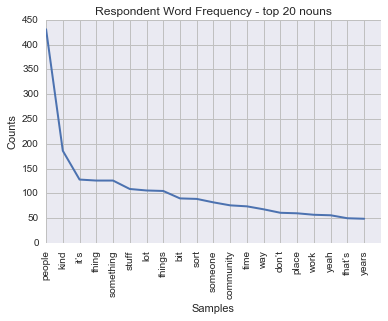

In [86]:
fd = nltk.FreqDist()

for bit in tagged_r:
    if bit[1] in permitted_tags and len(bit[0])>2:
        fd[bit[0]] = fd[bit[0]] + 1
        
plot1 = fd.plot(20, title = 'Respondent Word Frequency - top 20 nouns')

In [87]:
#KWIC modelling
import RAKE.RAKE as rake

In [88]:
rake_object = rake.Rake("data/SmartStoplist.txt")

In [90]:
tfile = open("data/SmartStoplist.txt", 'r')
stoplist = tfile.read()
tfile.close()
len(stoplist)

3693

In [91]:
keywords = rake_object.run(all_response)

In [92]:
keywords[:10]

[(u'michael sydney moore borrowing white spirit', 20.113636363636363),
 (u'circular tables create triangular edges', 19.314285714285713),
 (u'similar facebook group called festival pixies', 17.753823953823954),
 (u'started noticing west london types sort', 16.155513784461153),
 (u'hackney wick fish island facebook page', 15.461581733340712),
 (u'star wars dvd box set', 15.343333333333334),
 (u'hackney wick fish island facebook group', 14.3504706222296),
 (u'hackney wick fish island page', 13.325218096977075),
 (u'semi political policy drive', 12.166666666666666),
 (u'big essex contingency coming', 12.005813953488373)]

In [93]:
response_text = nltk.Text(word_response)

In [94]:
len(keywords[0][0])

43

In [96]:
response_text.concordance('kind')

Displaying 25 of 187 matches:
donate it.So the exchange is usually kind of happening in that way . Not so mu
te a lot of input on , yeah . That’s kind of an exchange as well I suppose . Y
were actually developing some prints kind of a few months ago . So I think the
one.But I know that because I’m that kind of person , that people need me more
his was the nicest one , yeah.It was kind of sad , which was great actually be
 was great actually because everyone kind of moved towards here after a few ye
don’t know what happened , how these kind of similar people attracted to the s
r jazz and rock on guitar and just , kind of , do whatever . There . It’s real
 I guess people who left are still , kind of , here in spirit yeah . Well it d
 to a random stranger and then you , kind of , make new friends.So if I have ,
now and then I think that’s a nice , kind of , energy thing . It depends on…ye
 , you know , ‘cause I’ve got this , kind of , Jewish grudgy thing . But you k
ing between California

In [97]:
response_text.concordance(keywords[0][0])

No matches


In [98]:
from nltk.corpus import stopwords
# ...
filtered_words = [word for word in word_response if word not in stopwords.words('english')]

filtered_words = [word for word in word_response if word not in stoplist]


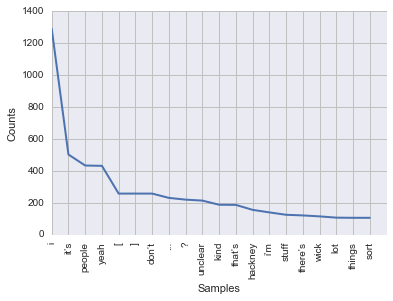

In [99]:
fd = nltk.FreqDist(word.lower() for word in filtered_words)
fd.plot(20)